In [47]:
import os
import numpy as np 
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt

import utils

## EDA

[paper](https://arxiv.org/abs/1909.09347)

In [36]:
df = utils.makeIndex(filePath = './data')
df.head(5)

,filepath,machine_id,machine_type,background_noise,target
0,c:\Users\kalika01\Desktop\MIMII - Sound datase...,0,fan,-6_dB,abnormal
1,c:\Users\kalika01\Desktop\MIMII - Sound datase...,0,fan,-6_dB,abnormal
2,c:\Users\kalika01\Desktop\MIMII - Sound datase...,0,fan,-6_dB,abnormal
3,c:\Users\kalika01\Desktop\MIMII - Sound datase...,0,fan,-6_dB,abnormal
4,c:\Users\kalika01\Desktop\MIMII - Sound datase...,0,fan,-6_dB,abnormal


### Number of samples and class balance per machine

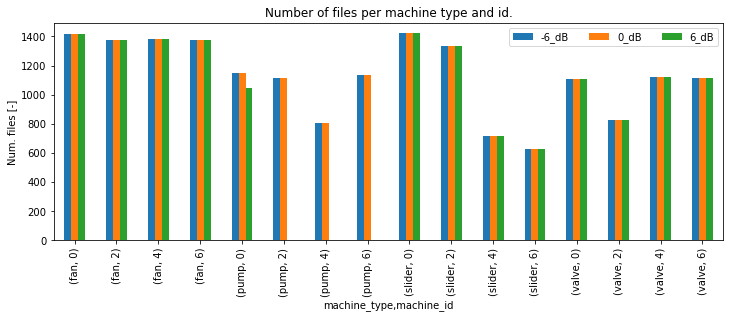

In [10]:
df.groupby(by = ['machine_type', 'machine_id', 'background_noise']).\
nunique()['filepath'].\
unstack().\
plot.bar(
    figsize = (12, 4),
    ylabel = 'Num. files [-]',
    title = 'Number of files per machine type and id.'
).\
legend(loc = 'upper right', ncol = 3);

* 4 machine types (fan, pump, slider, valve)
* 4 machines per type (id 0, 2, 4, 6)
* 3 (well-balanced) background noise levels for each machine type/id (apart from pumps 2, 4, 6 which miss '6dB' background noise levels)

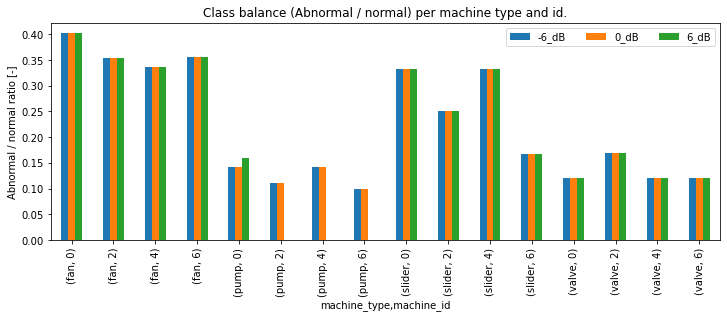

In [34]:
groups = df.groupby(by = ['machine_type', 'machine_id', 'background_noise', 'target']).\
nunique()['filepath'].\
unstack()

groups['class_balance'] = groups['abnormal'] / groups['normal']

groups['class_balance'].\
unstack().\
plot.bar(
    figsize = (12, 4),
    ylabel = 'Abnormal / normal ratio [-]',
    title = 'Class balance (Abnormal / normal) per machine type and id.'
).\
legend(loc = 'upper right', ncol = 3);

Only the fans and some sliders are well-balanced. Nothing extreme though.

### File examples



In [54]:
fs, data = wavfile.read(df['filepath'].iloc[0]) 
# data dims: (SampleRate [Hz] * 10 [s]) x Num. Microphones [-])

In [55]:
data.shape

(160000, 8)

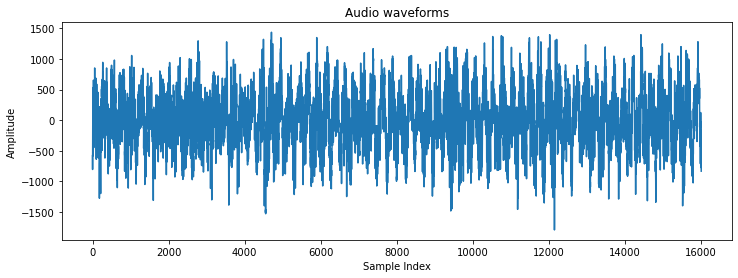

In [59]:
plt.figure(figsize = (12, 4))
plt.plot(data[:16000, 0]);
plt.xlabel('Sample Index');
plt.ylabel('Amplitude');
plt.title('Audio waveforms');

In [ ]:
# check this: https://towardsdatascience.com/audio-deep-learning-made-simple-part-1-state-of-the-art-techniques-da1d3dff2504

# file://schelde.com/DFSUserdata-nl$/Homedirs-S/kalika01/Downloads/Feature_Extraction_for_Bearing_Prognostics_and_Hea.pdf
# https://theses.hal.science/tel-01025295/document